### Before commencing the modelling, I would ask for more information. Demographic information such as (dealer vs private) and state, and more historical data about each member such as (number of previous leads, total number of leads so far) would help to predict whether the given user would submit a lead or not.
The quetion is about whether the user would submit a lead next day or not. But for now, I just create a model to check whether user would submit a lead according to the number of search and view and the time duration of search and view. 

# Modelling

In [1]:
# import the necessary modules here 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
df1 = pd.read_csv("data-interactions.csv")
df1.head()

,event,userid,utc_timestamp
0,view,4c02df98-fee3-43dd-8582-4192180a52c8,2019-01-17 03:49:36.838
1,search,bcc02079-d9d6-461a-bb7a-6ad679dc3ddb,2019-01-19 22:33:14.049
2,search,4443b108-11aa-44e8-9934-a9c75e7a5b2e,2019-01-20 06:54:42.97
3,search,a8513b28-c94b-49b4-9260-07f9ce8a24aa,2019-01-17 23:33:44.099
4,search,261eb70e-af13-4d0c-a2d8-7c2095586b2d,2019-01-20 01:28:01.169


## data wrangling

 The data is stacked. Each observation must be allocated to each member. 
 The below code line will unstack the data to multi-index dataframe

In [3]:
df2=df1.groupby(['userid', 'event'])['utc_timestamp'].apply(lambda x: pd.Series(list(x))).unstack()
df2.head()

0    \
userid                               event                             
000106a5-98bf-4f9d-a564-4210ab884c31 view    2019-01-18 10:37:37.133   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  2019-01-18 19:36:31.157   
                                     view    2019-01-18 19:36:28.636   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  2019-01-14 22:55:21.617   
                                     view    2019-01-14 05:35:42.304   

                                                                 1    \
userid                               event                             
000106a5-98bf-4f9d-a564-4210ab884c31 view                        NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search   2019-01-14 19:30:13.10   
                                     view    2019-01-15 06:10:08.065   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  2019-01-14 05:15:38.918   
                                     view    2019-01-17 10:50:25.419   

                                                                 2    \
userid                               event                             
000106a5-98bf-4f9d-a564-4210ab884c31 view                        NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search                      NaN   
                                     view    2019-01-14 20:56:59.778   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search   2019-01-14 22:51:39.85   
                                     view    2019-01-14 05:36:26.479   

                                                                 3    \
userid                               event                             
000106a5-98bf-4f9d-a564-4210ab884c31 view                        NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search                      NaN   
                                     view                        NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  2019-01-14 05:35:12.059   
                                     view    2019-01-17 10:46:54.335   

                                                                 4    \
userid                               event                             
000106a5-98bf-4f9d-a564-4210ab884c31 view                        NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search                      NaN   
                                     view                        NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  2019-01-17 10:51:27.003   
                                     view    2019-01-14 23:05:29.106   

                                                                 5    \
userid                               event                             
000106a5-98bf-4f9d-a564-4210ab884c31 view                        NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search                      NaN   
                                     view                        NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  2019-01-14 23:04:14.997   
                                     view                        NaN   

                                                                6    \
userid                               event                            
000106a5-98bf-4f9d-a564-4210ab884c31 view                       NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search                     NaN   
                                     view                       NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  2019-01-14 23:04:29.93   
                                     view                       NaN   

                                                                 7    \
userid                               event                             
000106a5-98bf-4f9d-a564-4210ab884c31 view                        NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search                      NaN   
                                     view                        NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  2019-01-19 10:42:05.186   
                                     view                        NaN   

                                

developing a function to convert all string date to seconds.

In [4]:
# converting string cells to date format timestap in seconds
def convert_date(datestring):
    ''' This function takes string date and return a float number'''
    if pd.notna(datestring):
        datestring = datestring[:19]
        dt = datetime.fromisoformat(datestring).timestamp()
        return dt

In [5]:
dt = datetime.fromisoformat('2019-01-14 22:55:21').timestamp()
print(dt, type(dt))

1547466921.0 <class 'float'>


Applying convert_date function to the dataframe

In [6]:
df2=df2.applymap(convert_date)
df2.head()

0             1    \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view    1.547768e+09           NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  1.547801e+09  1.547455e+09   
                                     view    1.547801e+09  1.547493e+09   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547467e+09  1.547403e+09   
                                     view    1.547405e+09  1.547683e+09   

                                                      2             3    \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view             NaN           NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search           NaN           NaN   
                                     view    1.547460e+09           NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547467e+09  1.547405e+09   
                                     view    1.547405e+09  1.547682e+09   

                                                      4             5    \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view             NaN           NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search           NaN           NaN   
                                     view             NaN           NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547683e+09  1.547467e+09   
                                     view    1.547468e+09           NaN   

                                                      6             7    \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view             NaN           NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search           NaN           NaN   
                                     view             NaN           NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547467e+09  1.547855e+09   
                                     view             NaN           NaN   

                                                      8             9   ...   \
userid                               event                              ...    
000106a5-98bf-4f9d-a564-4210ab884c31 view             NaN           NaN ...    
0001df26-753e-4d09-9923-6fb8fe3d7a1b search           NaN           NaN ...    
                                     view             NaN           NaN ...    
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547403e+09  1.547403e+09 ...    
                                     view             NaN           NaN ...    

                                             197  198  199  200  201  202  \
userid                               event                                  
000106a5-98bf-4f9d-a564-4210ab884c31 view    NaN  NaN  NaN  NaN  NaN  NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  NaN  NaN  NaN  NaN  NaN  NaN   
                                     view    NaN  NaN  NaN  NaN  NaN  NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  NaN  NaN  NaN  NaN  NaN  NaN   
                                     view    NaN  NaN  NaN  NaN  NaN  NaN   

                                             203  204  205  206  
userid                               event                       
000106a5-98bf-4f9d-a564-4210ab884c31 view    NaN  NaN  NaN  NaN  
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  NaN  NaN  NaN  NaN  
                                     view    NaN  NaN  NaN  NaN  
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  NaN  NaN  NaN  NaN  
                                     view    NaN  NaN  NaN  NaN  

[5 rows x 207 columns]

calculating the duration of search or view or lead. For how many seconds, the user is searching or viewing in the carsales website.


In [7]:
mx= df2.max(axis=1)
mn=df2.min(axis=1)
duration=mx-mn

calculating new columns as the number of search, view and leads

In [8]:
count = df2.count(axis = 1)

adding duration and count to dataframe

In [9]:
# df2['mx']=mx
# df2['mn']=mn
df2['duration']=duration
df2['count']=count
df2.head()

0             1  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view    1.547768e+09           NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  1.547801e+09  1.547455e+09   
                                     view    1.547801e+09  1.547493e+09   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547467e+09  1.547403e+09   
                                     view    1.547405e+09  1.547683e+09   

                                                        2             3  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view             NaN           NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search           NaN           NaN   
                                     view    1.547460e+09           NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547467e+09  1.547405e+09   
                                     view    1.547405e+09  1.547682e+09   

                                                        4             5  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view             NaN           NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search           NaN           NaN   
                                     view             NaN           NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547683e+09  1.547467e+09   
                                     view    1.547468e+09           NaN   

                                                        6             7  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view             NaN           NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search           NaN           NaN   
                                     view             NaN           NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547467e+09  1.547855e+09   
                                     view             NaN           NaN   

                                                        8             9  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view             NaN           NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search           NaN           NaN   
                                     view             NaN           NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547403e+09  1.547403e+09   
                                     view             NaN           NaN   

                                             ...    199  200  201  202  203  \
userid                               event   ...                              
000106a5-98bf-4f9d-a564-4210ab884c31 view    ...    NaN  NaN  NaN  NaN  NaN   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  ...    NaN  NaN  NaN  NaN  NaN   
                                     view    ...    NaN  NaN  NaN  NaN  NaN   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  ...    NaN  NaN  NaN  NaN  NaN   
                                     view    ...    NaN  NaN  NaN  NaN  NaN   

                                             204  205  206  duration  count  
userid                               event                                   
000106a5-98bf-4f9d-a564-4210ab884c31 view    NaN  NaN  NaN       0.0      1  
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  NaN  NaN  NaN  345978.0      2  
                                     view    NaN  NaN  NaN  340769.0      3  
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  NaN  NaN  NaN  451587.0     11  
                                     view    NaN  NaN  NaN  278083.0      5  

[5 rows x 209 columns]

replacing missing values with zero after calculating duration and count of observation in each row

In [10]:
df2=df2.fillna(0)
df2.head()

0             1  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view    1.547768e+09  0.000000e+00   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  1.547801e+09  1.547455e+09   
                                     view    1.547801e+09  1.547493e+09   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547467e+09  1.547403e+09   
                                     view    1.547405e+09  1.547683e+09   

                                                        2             3  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view    0.000000e+00  0.000000e+00   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  0.000000e+00  0.000000e+00   
                                     view    1.547460e+09  0.000000e+00   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547467e+09  1.547405e+09   
                                     view    1.547405e+09  1.547682e+09   

                                                        4             5  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view    0.000000e+00  0.000000e+00   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  0.000000e+00  0.000000e+00   
                                     view    0.000000e+00  0.000000e+00   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547683e+09  1.547467e+09   
                                     view    1.547468e+09  0.000000e+00   

                                                        6             7  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view    0.000000e+00  0.000000e+00   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  0.000000e+00  0.000000e+00   
                                     view    0.000000e+00  0.000000e+00   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547467e+09  1.547855e+09   
                                     view    0.000000e+00  0.000000e+00   

                                                        8             9  \
userid                               event                                
000106a5-98bf-4f9d-a564-4210ab884c31 view    0.000000e+00  0.000000e+00   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  0.000000e+00  0.000000e+00   
                                     view    0.000000e+00  0.000000e+00   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  1.547403e+09  1.547403e+09   
                                     view    0.000000e+00  0.000000e+00   

                                             ...    199  200  201  202  203  \
userid                               event   ...                              
000106a5-98bf-4f9d-a564-4210ab884c31 view    ...    0.0  0.0  0.0  0.0  0.0   
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  ...    0.0  0.0  0.0  0.0  0.0   
                                     view    ...    0.0  0.0  0.0  0.0  0.0   
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  ...    0.0  0.0  0.0  0.0  0.0   
                                     view    ...    0.0  0.0  0.0  0.0  0.0   

                                             204  205  206  duration  count  
userid                               event                                   
000106a5-98bf-4f9d-a564-4210ab884c31 view    0.0  0.0  0.0       0.0      1  
0001df26-753e-4d09-9923-6fb8fe3d7a1b search  0.0  0.0  0.0  345978.0      2  
                                     view    0.0  0.0  0.0  340769.0      3  
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696 search  0.0  0.0  0.0  451587.0     11  
                                     view    0.0  0.0  0.0  278083.0      5  

[5 rows x 209 columns]

In [11]:
# accessing different level o fmulti-index
# df3.loc[(slice(None), ['leads', 'view']), :]

### feature engineering
More feature can be extracted from the dataset specialy from the date formats. 
For now, I just used count and duration of search and number of views as the predictor of whether the customer would submit a lead or not.

In [12]:
# choosing only count and duration of search, visit, and leads
df3 = df2[['count','duration' ]]
df4=df3.unstack()
df4.tail()

count              duration            \
event                                leads search  view    leads    search   
userid                                                                       
fffbe102-c471-40e8-b271-cfca5a17fee7   NaN  112.0  17.0      NaN  432937.0   
fffc8d00-d186-4548-b8f6-93f4cf1390b1   NaN    2.0   1.0      NaN  477159.0   
fffcc71b-14fe-4bbb-bd71-b0093fb83f1c   NaN    1.0   NaN      NaN       0.0   
ffffc1cc-cf44-4fe2-9f51-6d051b16a7b9   NaN    1.0   NaN      NaN       0.0   
ffffcb29-39a2-47aa-9524-fdd738791b91   1.0   21.0   4.0      0.0  475323.0   

                                                
event                                     view  
userid                                          
fffbe102-c471-40e8-b271-cfca5a17fee7  424728.0  
fffc8d00-d186-4548-b8f6-93f4cf1390b1       0.0  
fffcc71b-14fe-4bbb-bd71-b0093fb83f1c       NaN  
ffffc1cc-cf44-4fe2-9f51-6d051b16a7b9       NaN  
ffffcb29-39a2-47aa-9524-fdd738791b91  210177.0

Descriptive statistics for each column

In [13]:
df4.describe()

count                                   duration                 \
event        leads        search          view          leads         search   
count  3418.000000  67276.000000  40097.000000    3418.000000   67276.000000   
mean      1.191633      5.593391      2.983415   14748.708602  106449.180332   
std       0.514206      8.147874      3.817587   60662.862298  160643.231118   
min       1.000000      1.000000      1.000000       0.000000       0.000000   
25%       1.000000      1.000000      1.000000       0.000000       0.000000   
50%       1.000000      3.000000      2.000000       0.000000    1331.500000   
75%       1.000000      6.000000      3.000000       0.000000  179675.000000   
max       8.000000    207.000000     91.000000  551838.000000  582370.000000   

                      
event           view  
count   40097.000000  
mean    87439.984662  
std    146728.855826  
min         0.000000  
25%         0.000000  
50%       197.000000  
75%    128798.000000  
max    580846.000000

The label or CV is decided to be lead. all count of leads are converted to 1 to make a binary column for lead. Then, multi-index columns are converted to single-index ones.

In [14]:
# creating the DV or label which is whether the member would submit a lead or not.
df4['lead']=df4[('count', 'leads')].replace(range(int(df4[('count', 'leads')].max())), 1)
# converting multi-index columns to single-index ones.
df4['Nview'] = df4[('count', 'view')]
df4['Nsearch'] = df4[('count', 'search')]
df4['Dview'] = df4[('duration', 'view')]
df4['Dsearch'] = df4[('duration', 'search')]
# filtering multi-index columns
df5 = df4.iloc[:,6:]
df5.head()

,lead,Nview,Nsearch,Dview,Dsearch
event,,,,,
userid,,,,,
000106a5-98bf-4f9d-a564-4210ab884c31,NaN,1.0,NaN,0.0,NaN
0001df26-753e-4d09-9923-6fb8fe3d7a1b,NaN,3.0,2.0,340769.0,345978.0
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696,NaN,5.0,11.0,278083.0,451587.0
0004c216-9046-4248-b399-48335da50a84,NaN,NaN,4.0,NaN,3426.0
0005bf39-e99e-4c38-8979-7ee748911594,NaN,NaN,1.0,NaN,0.0


 When there is only one search, the duration decided to be 1. when there is no search, it must be zero. 

In [15]:
df5[['Dview', 'Dsearch']] = df5[['Dview', 'Dsearch']].replace(0, 1)
# replacing missing values
df = df5.fillna(0)
df.head()

,lead,Nview,Nsearch,Dview,Dsearch
event,,,,,
userid,,,,,
000106a5-98bf-4f9d-a564-4210ab884c31,0.0,1.0,0.0,1.0,0.0
0001df26-753e-4d09-9923-6fb8fe3d7a1b,0.0,3.0,2.0,340769.0,345978.0
0003ee5d-a6c2-4d36-8adb-7c9b3c4dd696,0.0,5.0,11.0,278083.0,451587.0
0004c216-9046-4248-b399-48335da50a84,0.0,0.0,4.0,0.0,3426.0
0005bf39-e99e-4c38-8979-7ee748911594,0.0,0.0,1.0,0.0,1.0


## Random forest classifier

 
I would split the data to train and test. A Random forest classifier will be used.
The random forest model would be optimized by Grid Search CV for train part and the performance (ROC and AUC) would be measured on the test part. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

create training and testing parts

In [17]:
y = df['lead']
X=df[['Nview','Nsearch','Dview','Dsearch']]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
print ( X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(59689, 4) (59689,)
(14923, 4) (14923,)


Grid Search with Cross Validation for random forest hyperparameters and finding the best model.

In [18]:
# Grid Search with Cross Validation for random forest hyperparameters
parameters = {
    'n_estimators'      : [5,10,20],
    'max_depth'         : [4, 5, 6, 7, 8],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
# Fit on data
best_clf = clf.fit(X_train, Y_train)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


#### Best model for the given dataset

In [19]:
best_clf.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [20]:
# Measuring accuracy. Although, it's not a reliable measure for imbalanced data.
pred=best_clf.predict(X_test)
print("Accuracy for Random Forest on data: ",accuracy_score(Y_test,pred))
# since the data is imbalanced, accuracy is not a reliable measurement of performance. Best to draw AUC.

Accuracy for Random Forest on data:  0.9567111170676138


In [21]:
# Checking the level of class imbalance
print("The number of not_lead observation is", len(df[df['lead']==0]))
print("The number of lead observation is", len(df[df['lead']==1]))

The number of not_lead observation is 71194
The number of lead observation is 3417


#### Listing the feature importance

In [22]:
feature_imp = pd.DataFrame(best_clf.best_estimator_.feature_importances_,
                                   index =X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
feature_imp

,,importance
,event,
Nview,,0.421511
Nsearch,,0.257914
Dview,,0.243167
Dsearch,,0.077408


#### The number of view has the highest imprtace on deciding whether the user would submit a lead or not. After that, time duration of views in second, number of search, and duration of search have the highest importance respectively.

### Drawing ROC and AUC for measuring the classification performance.
AUC measures how true positive rate (recall) and false positive rate trade off.

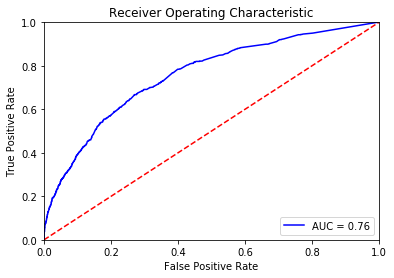

In [23]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = best_clf.best_estimator_.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### interpretation of ROC and AUC
The model performance is OK.
The base model's AUC is 0.5 (red line) whereas my model's is 0.77. 
Improvement:
1-More values for grid-search can be used to find the optimum model.
2- More features can be added to the model.